In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/indian_liver_patient.csv")
df.shape

(583, 11)

In [4]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [5]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [6]:
df.rename(columns={'Dataset':'target'},inplace=True)
df.head().T

,0,1,2,3,4
Age,65,62,62,58,72
Gender,Female,Male,Male,Male,Male
Total_Bilirubin,0.7,10.9,7.3,1,3.9
Direct_Bilirubin,0.1,5.5,4.1,0.4,2
Alkaline_Phosphotase,187,699,490,182,195
Alamine_Aminotransferase,16,64,60,14,27
Aspartate_Aminotransferase,18,100,68,20,59
Total_Protiens,6.8,7.5,7,6.8,7.3
Albumin,3.3,3.2,3.3,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1,0.4


In [7]:
le = LabelEncoder()
le.fit(df.Gender.unique())
df['Gender'] = le.transform(df.Gender)
df.head().T

,0,1,2,3,4
Age,65.0,62.00,62.00,58.0,72.0
Gender,0.0,1.00,1.00,1.0,1.0
Total_Bilirubin,0.7,10.90,7.30,1.0,3.9
Direct_Bilirubin,0.1,5.50,4.10,0.4,2.0
Alkaline_Phosphotase,187.0,699.00,490.00,182.0,195.0
Alamine_Aminotransferase,16.0,64.00,60.00,14.0,27.0
Aspartate_Aminotransferase,18.0,100.00,68.00,20.0,59.0
Total_Protiens,6.8,7.50,7.00,6.8,7.3
Albumin,3.3,3.20,3.30,3.4,2.4
Albumin_and_Globulin_Ratio,0.9,0.74,0.89,1.0,0.4


In [8]:
X = df.drop("target", axis = 1)
y = df["target"]

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
seed=1142

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(408, 10) (408,) (175, 10) (175,)


In [11]:
num_folds=10
scoring='accuracy'

In [15]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVC', SVC(random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed, n_jobs=-1 )))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))



results, names  = [], []

for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.708415 (0.026865)
CART: 0.688963 (0.064133)
SVC: 0.703354 (0.037615)
RF: 0.723110 (0.044572)
KNN: 0.675976 (0.062873)
NB: 0.534573 (0.084622)


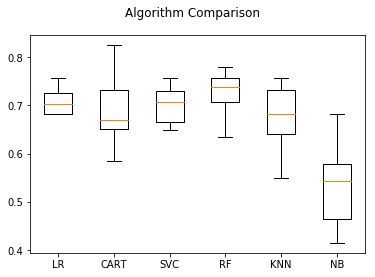

In [16]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [19]:
pipelines={}
pipelines['ScalerKNN']=Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsClassifier())])
pipelines['ScalerCART']=Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeClassifier())])
pipelines['ScalerNB']=Pipeline([('Scaler',StandardScaler()),('NB',GaussianNB())])
pipelines['ScalerSVM']=Pipeline([('Scaler',StandardScaler()),('SVM',SVC())])

results=[]
for key in pipelines:
    kfold=KFold(random_state=seed,n_splits=num_folds)
    cv_result=cross_val_score(pipelines[key],X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    print('%s:%f(%f)'%(key,cv_result.mean(),cv_result.std()))


ScalerKNN:0.680915(0.061738)
ScalerCART:0.686646(0.076815)
ScalerNB:0.534573(0.084622)
ScalerSVM:0.703354(0.037615)


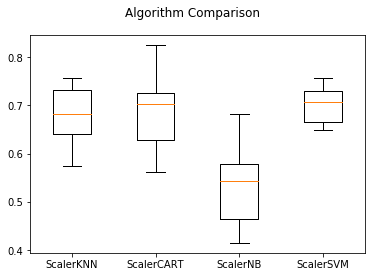

In [23]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(pipelines.keys())
plt.show()

In [29]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)

param_grid={'n_neighbors':[1,3,5,7,9,11,13,15,17,19,21]}

model=KNeighborsClassifier()

kfold=KFold(n_splits=num_folds,random_state=seed)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)

grid_result=grid.fit(X=rescaledX,y=y_train)
print('Best parameter:%s, Accuracy:%s'%(grid_result.best_params_,grid_result.best_score_))
print("*"*40)

cv_results=zip(grid_result.cv_results_['mean_test_score'],
               grid_result.cv_results_['std_test_score'],
               grid_result.cv_results_['params'])

for mean,std,param in cv_results:
    print('%f (%f) with %r'%(mean,std,param))

Best parameter:{'n_neighbors': 1}, Accuracy:0.7058823529411765
****************************************
0.705882 (0.073183) with {'n_neighbors': 1}
0.656863 (0.055157) with {'n_neighbors': 3}
0.678922 (0.060935) with {'n_neighbors': 5}
0.664216 (0.054342) with {'n_neighbors': 7}
0.678922 (0.084028) with {'n_neighbors': 9}
0.676471 (0.069665) with {'n_neighbors': 11}
0.698529 (0.065667) with {'n_neighbors': 13}
0.698529 (0.064229) with {'n_neighbors': 15}
0.698529 (0.069879) with {'n_neighbors': 17}
0.688725 (0.052150) with {'n_neighbors': 19}
0.693627 (0.053729) with {'n_neighbors': 21}


In [34]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)

param_grid={'n_estimators':[10,50,100,200,300,400,500,600,700,800,900]}
model=GradientBoostingClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(X=rescaledX,y=y_train)
print('Best Parameter:%s,Accuracy:%s'%(grid_result.best_params_,grid_result.best_score_))

cv_results=zip(grid_result.cv_results_['mean_test_score'],
               grid_result.cv_results_['std_test_score'],
               grid_result.cv_results_['params'])

for mean,std,param in cv_results:
    print('GBM%f (%f) with %r'%(mean,std,param))

Best Parameter:{'n_estimators': 50},Accuracy:0.7254901960784313
GBM0.708333 (0.039336) with {'n_estimators': 10}
GBM0.725490 (0.046936) with {'n_estimators': 50}
GBM0.710784 (0.054136) with {'n_estimators': 100}
GBM0.718137 (0.056098) with {'n_estimators': 200}
GBM0.718137 (0.050740) with {'n_estimators': 300}
GBM0.718137 (0.066068) with {'n_estimators': 400}
GBM0.710784 (0.067581) with {'n_estimators': 500}
GBM0.715686 (0.065059) with {'n_estimators': 600}
GBM0.718137 (0.069184) with {'n_estimators': 700}
GBM0.715686 (0.070822) with {'n_estimators': 800}
GBM0.710784 (0.074512) with {'n_estimators': 900}


In [40]:
ensembles={}

ensembles['ScalerKNN']=Pipeline([('Scaler',StandardScaler()),('KNN',AdaBoostClassifier())])
ensembles['ScalerCART']=Pipeline([('Scaler',StandardScaler()),('CART',AdaBoostClassifier())])
ensembles['ScalerNB']=Pipeline([('Scaler',StandardScaler()),('NB',AdaBoostClassifier())])
ensembles['ScalerSVM']=Pipeline([('Scaler',StandardScaler()),('SVM',AdaBoostClassifier())])

results=[]
for key in pipelines:
    kfold=KFold(random_state=seed,n_splits=num_folds)
    cv_result=cross_val_score(ensembles[key],X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    print('%s:%f(%f)'%(key,cv_result.mean(),cv_result.std()))

ScalerKNN:0.706280(0.065954)
ScalerCART:0.706280(0.065954)
ScalerNB:0.706280(0.065954)
ScalerSVM:0.706280(0.065954)


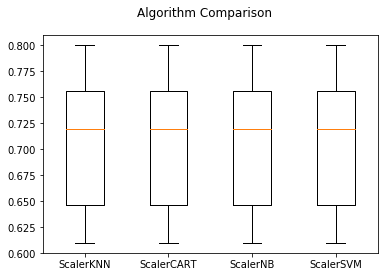

In [41]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [46]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)

param_grid={'n_estimators':[10,50,100,200,300,400,500,600,700,800,900]}
model=GradientBoostingClassifier()
kfold=KFold(n_splits=num_folds,random_state=seed)

grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)

grid_result=grid.fit(X=rescaledX,y=y_train)
print('Best Parameter:%s,Best Accuracy:%s'%(grid_result.best_params_,grid_result.best_score_))

cv_results=zip(grid_result.cv_results_['mean_test_score'],
               grid_result.cv_results_['std_test_score'],
               grid_result.cv_results_['params'])

for mean,std,param in cv_results:
    print('Gradient Boosting: %f (%f) with %r'%(mean,std,param))


Best Parameter:{'n_estimators': 50},Best Accuracy:0.7254901960784313
Gradient Boosting: 0.708333 (0.039336) with {'n_estimators': 10}
Gradient Boosting: 0.725490 (0.046936) with {'n_estimators': 50}
Gradient Boosting: 0.710784 (0.054136) with {'n_estimators': 100}
Gradient Boosting: 0.715686 (0.055137) with {'n_estimators': 200}
Gradient Boosting: 0.715686 (0.054042) with {'n_estimators': 300}
Gradient Boosting: 0.718137 (0.065637) with {'n_estimators': 400}
Gradient Boosting: 0.718137 (0.072145) with {'n_estimators': 500}
Gradient Boosting: 0.725490 (0.071315) with {'n_estimators': 600}
Gradient Boosting: 0.723039 (0.071854) with {'n_estimators': 700}
Gradient Boosting: 0.718137 (0.072383) with {'n_estimators': 800}
Gradient Boosting: 0.710784 (0.069714) with {'n_estimators': 900}


In [52]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=SVC(C=1.0,kernel='rbf')
model.fit(X=rescaledX,y=y_train)

rescaledX_validation=scaler.transform(X_test)
preditions=model.predict(X_test)
print('Accuracy:',accuracy_score(preditions,y_test))
print('Confusion Matrix:',confusion_matrix(preditions,y_test))
print('Classification result:',classification_report(preditions,y_test))

Accuracy: 0.7142857142857143
Confusion Matrix: [[125  50]
 [  0   0]]
Classification result:              precision    recall  f1-score   support

          1       1.00      0.71      0.83       175
          2       0.00      0.00      0.00         0

avg / total       1.00      0.71      0.83       175



C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [51]:
classification_report(preditions,y_test)

C:\Users\sarak\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'             precision    recall  f1-score   support\n\n          1       1.00      0.71      0.83       175\n          2       0.00      0.00      0.00         0\n\navg / total       1.00      0.71      0.83       175\n'